In [1]:
library(tidyverse)
library(RColorBrewer)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
############################################################################
#                                                                          #
#                          SET PARAMETERS HERE                             #
#                                                                          #
############################################################################

############### input parameters (in data folder) ##########################
# input_folder = "all_germline_filtered_bams_tumor_ci5_cs1e9" # "all_germline_ci5_cs1e9" # "ci5_cs1e9" # "cs1e9"
input_folder = "all_germline_filtered_bams_tumor_subtract_other_tumor_ci5_cs1e9"
#filename =  "plotdata_unique_tumor_all_germline_singletons_excluded_tumor_4_cs_filtered.txt" # "plotdata_intersection_singletons_excluded_tumor_4_cs_filtered.txt" # "plotdata_intersection_cs1e9_filtered.txt"
filename = "plotdata_intersection_filtered.txt"

############### output parameters (in plotting_results folder) #############
#output_folder = "ci1_cs1e9" # "ci5_cs1e9" # "union_germline_ci4_cs1e9" # "union_germline_filtered_tumor_bams_ci5_cs1e9"
output_folder = "union_germline_filtered_tumor_bams_subtract_other_tumors_ci5_cs1e9"
#plot_title = "Unique tumor kmers" # "Tumor kmers"
plot_title = "Unique tumor kmers found in cfDNA samples"


paramspace <- read.csv("../data/metadata/paramspace_cfDNA_phaseI.csv", sep = ",")
dim(paramspace)
#output_path_unique_kmers, pt_id

[1] 190   5

In [3]:
head(paramspace)

pt_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450


In [4]:
paramspace <- paramspace %>% 
  mutate(tmp_chunks = stringr::str_split(cfDNA_folder, stringr::fixed("_"),  n = 3)) %>%
  mutate(sampleID = map_chr(tmp_chunks, 1),
         sub_value = map_chr(tmp_chunks, 2), 
         sub_val = map_chr(tmp_chunks, 3)) %>%
  select(-c(tmp_chunks, sub_value, sub_val))

head(paramspace)
dim(paramspace)

pt_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,sampleID
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C303A04689D
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C305A04689D
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C309A04689D
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C302A04689D
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C299A04689D
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C307A04689D


[1] 190   6

In [5]:
sample_timepoint <- read.csv("../data/metadata/clin_data/sample_timepoint_formatted.csv")

In [6]:
sample_timepoint_days <- sample_timepoint %>% filter(phase == "phaseI")
sample_timepoint_days <- sample_timepoint_days %>% select(sampleID, sample_timepoint_days_since_OP)
print(sample_timepoint_days %>% filter(is.na(sample_timepoint_days_since_OP)))
dim(sample_timepoint_days)
head(sample_timepoint_days)

[1] sampleID                       sample_timepoint_days_since_OP
<0 rows> (or 0-length row.names)


[1] 190   2

sampleID,sample_timepoint_days_since_OP
C299A04689D,-1
C300A04689D,37
C301A04689D,93
C302A04689D,175
C303A04689D,267
C304A04689D,362


In [7]:
paramspace$sampleID <- as.character(paramspace$sampleID)
paramspace <- left_join(paramspace, sample_timepoint_days, by = c("sampleID"))
head(paramspace)
dim(paramspace)

pt_id,cfDNA_folder,cfDNA_file,cfDNA_bam_path,unique_kmers_folder,sampleID,sample_timepoint_days_since_OP
C04689,C303A04689D_cfdna_N295-103,C303A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C303A04689D_cfdna_N295-103/C303A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C303A04689D,267
C04689,C305A04689D_cfdna_N295-71,C305A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C305A04689D_cfdna_N295-71/C305A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C305A04689D,454
C04689,C309A04689D_cfdna_N295-47,C309A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C309A04689D_cfdna_N295-47/C309A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C309A04689D,820
C04689,C302A04689D_cfdna_N295-102,C302A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C302A04689D_cfdna_N295-102/C302A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C302A04689D,175
C04689,C299A04689D_cfdna_N295-99,C299A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C299A04689D_cfdna_N295-99/C299A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C299A04689D,-1
C04689,C307A04689D_cfdna_N295-110,C307A04689D_cfdna.aligned.sorted.markdup.bam,../../DerivedData/main_data/C04689/C307A04689D_cfdna_N295-110/C307A04689D_cfdna.aligned.sorted.markdup.bam,C123T04689D_frfr_N295-450,C307A04689D,637


[1] 190   7

In [8]:
data_all <- NULL

plots <- NULL

getPalette = colorRampPalette(brewer.pal(9, "Blues"))

for (pt in unique(paramspace$pt_id)){
    pt_paramspace <- paramspace %>% filter(pt_id == pt)
    print(pt)
    
    data_all_pt <- NULL
    for (row in 1:nrow(pt_paramspace)){
        fd = pt_paramspace[row, "cfDNA_folder"]
        sample_timepoint = pt_paramspace[row, "sample_timepoint_days_since_OP"]
        data <- read.table(paste("../data/", pt, "/", fd ,"/", input_folder, "/", filename, sep = ""))
        data <- data %>% mutate(sample_timepoint = sample_timepoint)
        
        data_all_pt <- rbind(data_all_pt, data)    
    }
    data_all_pt <- data_all_pt %>% arrange(sample_timepoint)
    data_all_pt$sample_timepoint <- as.factor(data_all_pt$sample_timepoint)
    colourCount = length(unique(data_all_pt$sample_timepoint))
    
    colnames(data_all_pt) <- c("count", "n", "sample_timepoint")
    print(head(data_all_pt))
    
    data_all_1000 <- data_all_pt %>% filter(count <= 1000)
    
    line_smooth <- ggplot(data_all_1000) + 
        geom_smooth(aes(count, log10(n), color = sample_timepoint), size = 0.5, alpha = 1, se = FALSE) + 
        geom_line(aes(count, log10(n), color = sample_timepoint), size = 0.3, alpha = 0.2) + 
        theme_minimal()  + 
        #annotate("text", x = 250, y = log10(max(data_only_250$n)) + 0.6, label = data_only_250$patient_id[which(data_only_250$n == max(data_only_250$n))]) +
        scale_color_manual(values = getPalette(colourCount)) + 
        labs(x = "Number of times k-mer is observed",
             y = "log(Number of k-mers)", 
            title = paste(plot_title, sep =  ""),
            subtitle = paste("Patient ", pt, "\nPipeline ", input_folder, sep =  ""))
    
    ggsave(
      paste("../plotting_results/", output_folder, "/kmer_distributions/unique_tumor_cfDNA_intersection_kmer_distributions/Patient_", pt, "_Unique_tumor_cfDNA_intersection_kmer_count_distribution", ".png", sep = ""),
      line_smooth, dpi = "print")

    
    plots[[pt]] <- line_smooth
    
    
    }


[1] "C04689"
  count    n sample_timepoint
1     1 6132               -1
2     2 4969               -1
3     3  827               -1
4     4 1256               -1
5     5 1220               -1
6     6 1637               -1


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C04816"
  count      n sample_timepoint
1     1 788384               -6
2     2 402954               -6
3     3  43365               -6
4     4  37384               -6
5     5   6299               -6
6     6   5497               -6


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C04837"
  count    n sample_timepoint
1     1 1312               -1
2     2  821               -1
3     3  342               -1
4     4  398               -1
5     5  491               -1
6     6  516               -1


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C04849"
  count    n sample_timepoint
1     1 5879                0
2     2 5823                0
3     3  341                0
4     4  213                0
5     5   71                0
6     6   30                0


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C04873"
  count    n sample_timepoint
1     1 1797               -1
2     2 2140               -1
3     3   87               -1
4     4  259               -1
5     5   22               -1
6     6   27               -1


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C04874"
  count    n sample_timepoint
1     1 3727               -6
2     2 2481               -6
3     3  272               -6
4     4  508               -6
5     5  282               -6
6     6  394               -6


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C04886"
  count    n sample_timepoint
1     1 4273                0
2     2 2113                0
3     3  533                0
4     4  355                0
5     5  169                0
6     6  126                0


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C04887"
  count    n sample_timepoint
1     1 1947               -1
2     2 1166               -1
3     3  313               -1
4     4  318               -1
5     5  517               -1
6     6  837               -1


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C05048"
  count    n sample_timepoint
1     1 5796               -1
2     2 8250               -1
3     3  655               -1
4     4 1156               -1
5     5   79               -1
6     6  159               -1


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C05073"
  count    n sample_timepoint
1     1 2561               -3
2     2 3141               -3
3     3  758               -3
4     4  898               -3
5     5  645               -3
6     6  597               -3


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C05084"
  count    n sample_timepoint
1     1 2300                0
2     2 1561                0
3     3  354                0
4     4  528                0
5     5  517                0
6     6  602                0


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C05118"
  count     n sample_timepoint
1     1 29062               -7
2     2 29329               -7
3     3  2394               -7
4     4  2918               -7
5     5   364               -7
6     6   446               -7


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C05194"
  count    n sample_timepoint
1     1 1136                0
2     2  427                0
3     3   52                0
4     4   72                0
5     5   13                0
6     6   27                0


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C05234"
  count     n sample_timepoint
1     1  6895               -4
2     2 10400               -4
3     3  1276               -4
4     4  2741               -4
5     5   875               -4
6     6  1124               -4


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


[1] "C05703"
  count    n sample_timepoint
1     1 2671                0
2     2 1399                0
3     3  616                0
4     4  759                0
5     5  886                0
6     6 1020                0


Saving 6.67 x 6.67 in image
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


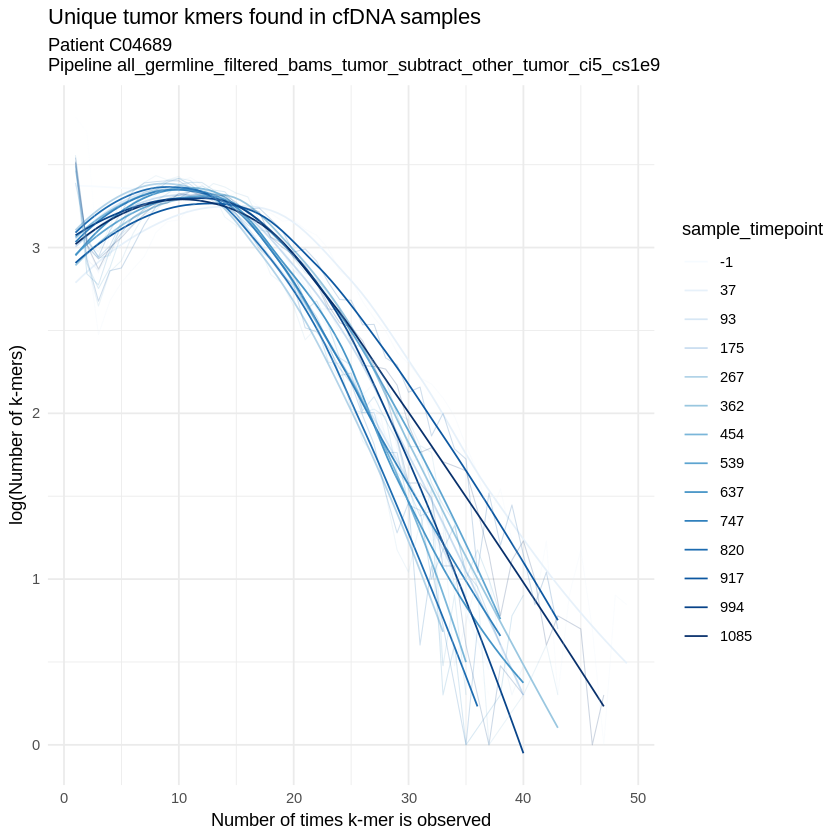

In [9]:
plots[["C04689"]]